### 지도학습 회귀 미리보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 농어 무게 예측하기
- k-최근접이웃 회귀모델을 통해 길이값으로 무게 예측

In [3]:
# 데이터 준비
# - 입력 : 길이
# - 라벨(정답) : 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

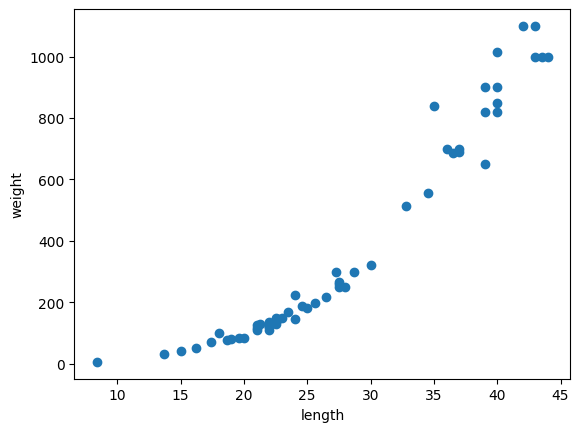

In [4]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(perch_length, perch_weight, random_state=42)
train_input.shape, train_label.shape, test_input.shape, test_label.shape


((42,), (42,), (14,), (14,))

In [6]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

train_input.shape, test_input.shape

((42, 1), (14, 1))

### 훈련

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_label)

KNeighborsRegressor()

### 평가 - 결정계수 $R^2$
$$
    결정계수 = 1 - \frac{(실제값-예측)^2의 합}{(실제값-평균)^2의 합}
$$
- 0 ~ 1 사이의 값을 반환하고, 1에 가까울수록 정확하다는 뜻

In [8]:
knr.score(test_input, test_label)

0.992809406101064

### 예측

In [9]:
pred = knr.predict([[30]])
pred

array([311.4])

In [10]:
distance, index = knr.kneighbors([[30]])
distance, index 

(array([[1.3, 2.5, 2.5, 2.8, 3.5]]), array([[28, 13, 18, 20, 21]]))

In [11]:
# 최근접 이웃 5개 무게 값의 평균치
train_label[index].mean()

np.float64(311.4)

##### 최근접이웃모델의 한계
- 메모리에 로드된 데이터포인트만 대상으로 예측하므로 한계점에서 취약
- 용량이 큰 데이터를 메모리에 로드하는 것도 문제

In [12]:
# 무게 50, 100이 1010이 동일한게 이상. knr의 한계계
knr.predict([[50], [100]])

array([1010., 1010.])

### 선형회귀 모델
- 속성에 따라 회귀 계수와 절편을 학습하고, 이를 통해 예측

**컬럼이 하나인 경우**
$y = wx + b$
1. 회귀계수 (=기울기, 가중치, weight, coefficient)
2. 절편 (=편향, bias, itercept)

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_label)
# lr.score(test_input, test_label)


LinearRegression()

In [15]:
# 회귀 계수, 절편
lr.coef_, lr.intercept_


(array([39.01714496]), np.float64(-709.0186449535474))

In [16]:
# 예측값 직접 계산
w = lr.coef_
b = lr.intercept_
x = np.array([50, 100])

# y = wx + b
w * x + b

array([1241.83860323, 3192.69585141])

In [17]:
# 모델을 통한 예측
lr.predict([[50], [100]])

array([1241.83860323, 3192.69585141])

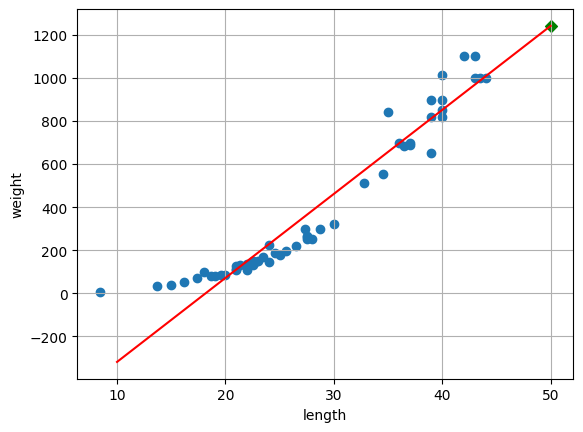

In [22]:
# 시각화
plt.scatter(perch_length, perch_weight)
plt.plot([10, 50], [w * 10 + b, w * 50 + b], color='red') # (시작점, 끝점)
plt.scatter(50, 50 * w + b, color='green', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.grid(True)
plt.show()

In [23]:
lr.score(test_input, test_label)

0.824750312331356

**컬럼이 여러 개인 경우**

$y = w_1x_1 + w_2x_2 + w_3x_3 + ... + b $

1. 회귀 계수 여러 개
2. 절편 한 개

In [27]:
# 데이터 로드
perch_df = pd.read_csv('./data/perch_full.csv')
perch_df.info()
perch_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [31]:
# 입력 데이터
perch_full = perch_df.to_numpy()
perch_full.shape

(56, 3)

In [37]:
# 라벨 데이터
perch_weight.shape

(56,)

In [36]:
perch_full[:5, :], perch_weight[:5]

(array([[ 8.4 ,  2.11,  1.41],
        [13.7 ,  3.53,  2.  ],
        [15.  ,  3.82,  2.43],
        [16.2 ,  4.59,  2.63],
        [17.4 ,  4.59,  2.94]]),
 array([ 5.9, 32. , 40. , 51.5, 70. ]))

In [39]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)

In [43]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [51]:
# 가중치, 절편 -> 직접 계산
lr.coef_, lr.intercept_
w1, w2, w3 = lr.coef_
b = lr.intercept_
x1, x2, x3 = 20.0, 5.08, 2.77

# y = wx + b
w1 * x1 + w2 * x2 + w3 * x3+ b


np.float64(40.484698833552216)

In [50]:
# 예측
lr.predict([[x1, x2, x3]])

array([40.48469883])

In [52]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.8796419177546367, 0.9559326821885706)

### 특성 공학 (Feature Enginieering)
- 기게학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성
    - 특성 변환
    - 결측치 처리
    - 차원 축소
    - 범주형 데이터 처리 (인코딩)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

# include_bias : 편향을 포함할껀지 기본 값은 True, 1 특성 포함
# degree : 기본 값은 2, 차수 특성을 늘리는 작업 : 장점은? 
# 특성을 늘리면 성능이 향상?
poly = PolynomialFeatures(include_bias=False)
poly.fit([[4, 5]])
poly.transform([[4, 5]])

array([[ 4.,  5., 16., 20., 25.]])

In [60]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [59]:
poly = PolynomialFeatures(include_bias=False, degree=3)
poly.fit([[4, 5]])
poly.transform([[4, 5]])

array([[  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [62]:
# 농어 데이터 특성 추가
poly = PolynomialFeatures(include_bias=False, degree=2)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
# poly_perch

In [63]:
# 훈련-테스트 데이터 분리
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [66]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [67]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.9714559911594125, 0.9903183436982126)

##### 특성 5차까지 늘려보기

In [69]:
# 농어 데이터 특성 추가
poly = PolynomialFeatures(include_bias=False, degree=4)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)
# poly_perch

In [70]:
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [71]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [72]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(-6.786696932218207, 0.9995286898073679)

In [75]:
poly = PolynomialFeatures(include_bias=False, degree=5)
poly.fit(perch_full)
poly_perch = poly.transform(perch_full)

In [76]:
train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

In [77]:
# 훈련
lr = LinearRegression()
lr.fit(train_input, train_label)

LinearRegression()

In [78]:
# 평가
lr.score(test_input, test_label), lr.score(train_input, train_label)

(-144.40564483377855, 0.9999999999997232)

In [81]:
poly = PolynomialFeatures(include_bias=False, degree=3)
# poly.fit(perch_full)
# ploy_perch = poly.transform(perch_full)
poly_perch = poly.fit_transform(perch_full)

train_input, test_input, train_label, test_label = train_test_split(perch_full, perch_weight, random_state=42)

lr = LinearRegression()
lr.fit(train_input, train_label)
lr.score(test_input, test_label), lr.score(train_input, train_label)

(0.8796419177546367, 0.9559326821885706)

In [89]:
def test_ploy(degree):
    poly = PolynomialFeatures(include_bias=False, degree=degree)
    poly_perch = poly.fit_transform(perch_full)

    train_input, test_input, train_label, test_label = train_test_split(poly_perch, perch_weight, random_state=42)

    lr = LinearRegression()
    lr.fit(train_input, train_label)
    return lr.score(train_input, train_label), lr.score(test_input, test_label)


In [94]:
for i in range(2, 6):
   print(test_ploy(i))

(0.9903183436982126, 0.9714559911594125)
(0.9963872340980141, 0.9410534492198891)
(0.9995286898073679, -6.786696932218207)
(0.9999999999997232, -144.40564483377855)


### 과대적합

**과대적합 (overfitting)**
- 모델이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화 되지 않은 상태
- 훈련 데이터에 대한 평가는 좋지만 테스트 데이터에 대한 평가가 떨어지는 상태
- 훈련 데이터의 잡음까지 학습한 상태
- 해결 방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘리기
    - L1, L2가 적용된 규제 모델 사용하기


**과소적합 (underfitting)**
- 모델 훈련이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공하기
    - 특성을 추가해 복잡한 패턴을 학습시키기